# Introducción a Teoría Grafos y Análisis de Redes con NetworkX

## 1.1. Creación de grafos

**Importar modulos**

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

**Nodos y enlaces**

In [2]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)] 

**Creación de grafo en networkX**

In [3]:
G = nx.Graph()
G.add_nodes_from(node_labels)
G.add_edges_from(edge_labels)

**Especificación de layout**

In [4]:
pos = nx.layout.spectral_layout(G)
pos = nx.spring_layout(G, pos=pos, iterations=20, seed=0)

In [5]:
l_colors = ["#a5cf52", "#a5cf52", "#a5cf52", "#cf52a5", "#cf52a5", ]

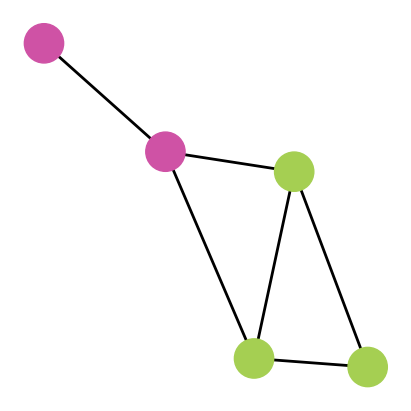

In [6]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
nx.draw_networkx_nodes(G, pos, node_color=l_colors, linewidths=1, ax=axs, node_size=800)
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
_ = axs.axis('off')

También es posible crear grafos directamente desde la matriz de adyacencia:

In [7]:
A = np.array([
  [0,1,1,0,0],
  [0,0,1,1,0],
  [0,1,0,0,1],
  [0,1,0,0,1],
  [0,0,1,1,0],
]) 

In [8]:
G = nx.Graph(A)

In [9]:
pos = nx.spring_layout(G, pos=pos, iterations=20, seed=0)

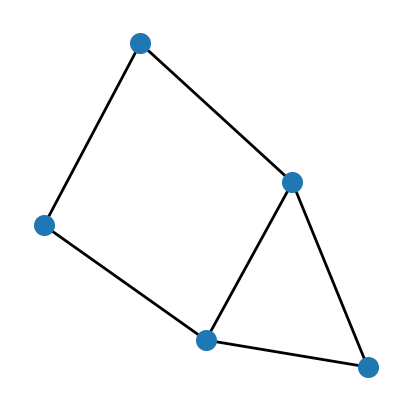

In [10]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
nx.draw_networkx_nodes(G, pos, linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
_ = axs.axis('off')

---

## 1.2. Grafos dirigidos (Digrafos)

Text(0.5, 1.0, '$\\overline{D}$')

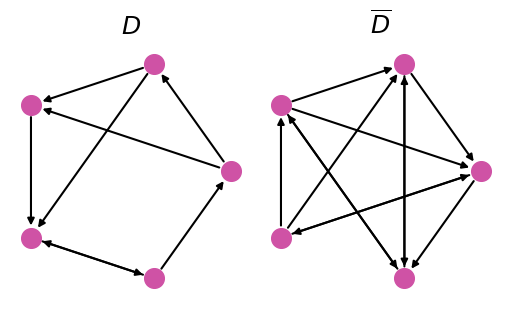

In [11]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (4,3), (3,4), (1,3), (4,0)]

fig, axs = plt.subplots(figsize=(5,3), facecolor='w', nrows=1, ncols=2, constrained_layout=True)

# definicion del digrafo D

D = nx.DiGraph()
D.add_nodes_from(node_labels)
D.add_edges_from(edge_labels)
pos = nx.layout.circular_layout(D)
nx.draw_networkx_nodes(D, pos, node_color="#cf52a5", linewidths=1, ax=axs[0], node_size=200)
nx.draw_networkx_edges(D, pos, width=1.5, ax=axs[0])
axs[0].axis('off')

# definicion del complemento de D

D_complement = nx.complement(D)
pos = nx.layout.circular_layout(D_complement)
nx.draw_networkx_nodes(D_complement, pos, node_color="#cf52a5", linewidths=1, ax=axs[1], node_size=200)
nx.draw_networkx_edges(D_complement, pos, width=1.5, ax=axs[1]) #52a5cf
axs[1].axis('off')

axs[0].set_title(r"$D$", fontsize=18)
axs[1].set_title(r"$\overline{D}$", fontsize=18)


## 1.3. Grafos ponderados

In [12]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)]
weight = [1, 1, 2, 2, 4, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [13]:
W = nx.Graph()
W.add_nodes_from(node_labels)
W.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$W$')

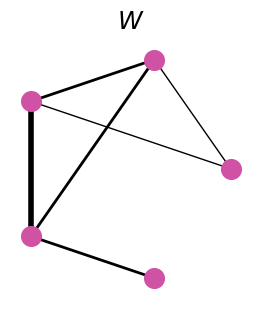

In [14]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(W)
nx.draw_networkx_nodes(W, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(W, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$W$", fontsize=18)

In [15]:
W.edges.data("weight")

EdgeDataView([(0, 1, 1), (0, 2, 1), (1, 2, 2), (1, 3, 2), (2, 3, 2), (3, 4, 4)])

In [16]:
WA = nx.adjacency_matrix(W, weight='weight').todense()
WA

array([[0, 1, 1, 0, 0],
       [1, 0, 2, 2, 0],
       [1, 2, 0, 2, 0],
       [0, 2, 2, 0, 4],
       [0, 0, 0, 4, 0]])

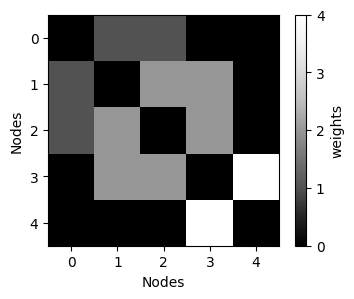

In [17]:
fig, axs = plt.subplots(figsize=(4,3), facecolor='w', nrows=1, ncols=1)
cmap_ = plt.cm.get_cmap('Greys_r')
im = axs.imshow(WA, cmap=cmap_)
cbar = plt.colorbar(im, ax=axs, ticks=[0,1,2,3,4])
cbar.set_label("weights")
axs.set_xlabel("Nodes"); axs.set_ylabel("Nodes");

## 1.4. Grafos dirigidos y ponderados

In [18]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (4,3), (3,4), (1,3), (4,0)]
weight = [1, 1, 2, 2, 4, 2, 1, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [19]:
WD = nx.DiGraph()
WD.add_nodes_from(node_labels)
WD.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$WD$')

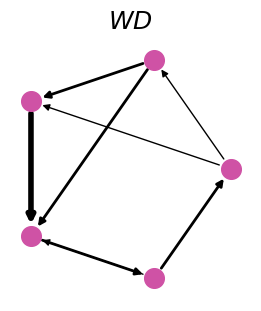

In [20]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(WD)
nx.draw_networkx_nodes(WD, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(WD, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$WD$", fontsize=18)

## 1.5. Grafo Bipartito

In [21]:
list_artists_names = [
    'Slow Joy', 
    'La ciencia simple', 
    'Origami Angel',  
    'Jeff Rosenstock',  
    'Millencolin', 
    'NoFX', 
    ]

In [22]:
users_and_artists = { #keys: user_id, value: list of artist the user likes
    0 : [0, 1, 2],
    1 : [2, 3],
    2 : [4, 5],
    3 : [2, 4, 5]
    }

In [23]:
list_users = list(users_and_artists.keys())
list_users

[0, 1, 2, 3]

In [24]:
list_artists = list(users_and_artists.values())
list_artists

[[0, 1, 2], [2, 3], [4, 5], [2, 4, 5]]

In [25]:
list_artists = list(users_and_artists.values())
print(list_artists)
list_artists = np.unique(np.concatenate(list_artists))
list_artists

[[0, 1, 2], [2, 3], [4, 5], [2, 4, 5]]


array([0, 1, 2, 3, 4, 5])

In [26]:
U = len(list_users)
A = len(list_artists)
print("U = %i; A = %i" % (U, A))

U = 4; A = 6


In [27]:
conn_matrix = np.zeros(shape=(U,A))
conn_matrix

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [28]:
users_and_artists[1]

[2, 3]

In [29]:
for i_u in range(U):
  print(users_and_artists[i_u])
  conn_matrix[i_u, users_and_artists[i_u]] = 1

[0, 1, 2]
[2, 3]
[4, 5]
[2, 4, 5]


In [30]:
conn_matrix

array([[1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1., 1.]])

### 1.5.1. Grafo de usuarios conectados por artistas

In [31]:
conn_matrix[0,:]

array([1., 1., 1., 0., 0., 0.])

In [32]:
conn_matrix[1,:]

array([0., 0., 1., 1., 0., 0.])

In [33]:
users_mat = np.zeros(shape=(U,U))
for i in range(U):
  for j in range(i+1, U):
    if np.sum(conn_matrix[i,:]*conn_matrix[j,:])>0:
      users_mat[i,j] = np.sum(conn_matrix[i,:]*conn_matrix[j,:]) # 1
    users_mat[j,i] = users_mat[i,j]

In [34]:
users_mat

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 2.],
       [1., 1., 2., 0.]])

In [35]:
G_users = nx.Graph(users_mat)

In [36]:
labels = nx.get_edge_attributes(G_users,'weight')

Text(0.5, 1.0, '$Graph\\ (Users)$')

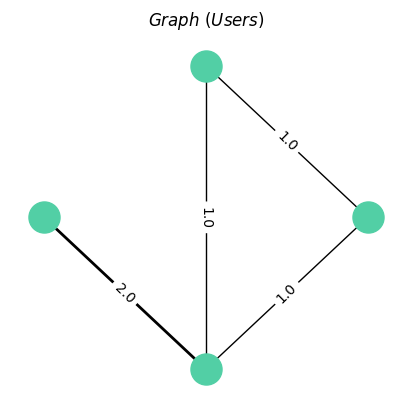

In [37]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(G_users)
nx.draw_networkx_nodes(G_users, pos, node_color="#52cfa5", linewidths=1, ax=axs, node_size=500)
nx.draw_networkx_edges(G_users, pos, width=list(labels.values()), ax=axs)
nx.draw_networkx_edge_labels(G_users,pos=pos,edge_labels=labels)
axs.axis('off')
axs.set_title(r"$Graph\ (Users)$", fontsize=12)

### 1.5.2. Grafo de artistas conectados por usuarios

In [38]:
artists_mat = np.zeros(shape=(A,A))
for i in range(A):
  for j in range(i+1, A):
    if np.sum(conn_matrix[:,i]*conn_matrix[:,j])>0:
      artists_mat[i,j] = np.sum(conn_matrix[:,i]*conn_matrix[:,j]) #1
      artists_mat[j,i] = artists_mat[i,j]

In [39]:
artists_mat

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 2.],
       [0., 0., 1., 0., 2., 0.]])

In [40]:
G_artists = nx.Graph(artists_mat)

In [41]:
labels = nx.get_edge_attributes(G_artists,'weight')

In [42]:
labels

{(0, 1): 1.0,
 (0, 2): 1.0,
 (1, 2): 1.0,
 (2, 3): 1.0,
 (2, 4): 1.0,
 (2, 5): 1.0,
 (4, 5): 2.0}

In [43]:
list(labels.values())

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]

Text(0.5, 1.0, '$Graph\\ (Users)$')

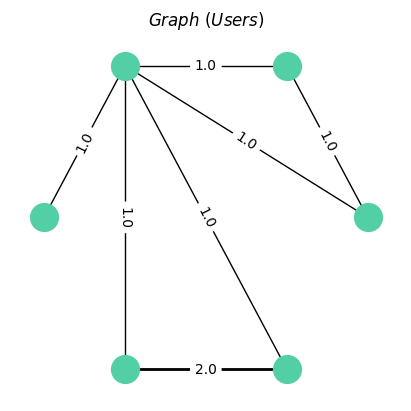

In [44]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(G_artists)
nx.draw_networkx_nodes(G_artists, pos, node_color="#52cfa5", linewidths=1, ax=axs, node_size=400)
nx.draw_networkx_edges(G_artists, pos, width=list(labels.values()), ax=axs)
nx.draw_networkx_edge_labels(G_artists,pos=pos,edge_labels=labels)
axs.axis('off')
axs.set_title(r"$Graph\ (Users)$", fontsize=12)

---

# 2. Topología y propiedades de la red

**Ejemplo:** Florenntine families graph

In [45]:
G = nx.florentine_families_graph()

In [46]:
pos = nx.spring_layout(G, iterations=50, seed=0)

Text(0.5, 1.0, '$Florentine\\ families\\ graph$')

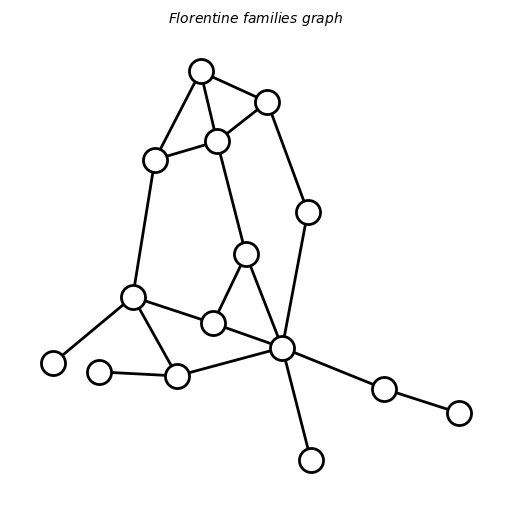

In [47]:
fig, axs = plt.subplots(figsize=(5,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color='white', linewidths=2, edgecolors='k', ax=axs)
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=10)

## 2.1. Métricas de topología

#### 2.1.1. Tamaño de la red ($N_i$)

In [48]:
network_size = G.number_of_nodes() 
network_size

15

#### 2.1.2. Número de enlaces ($E_i$)

In [49]:
number_of_links = G.number_of_edges() 
number_of_links

20

#### 2.1.3. Grado del nodo ($K_{i,u}$)

In [50]:
G.degree()

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [51]:
dict(G.degree()).values()

dict_values([1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1])

In [52]:
G_degrees = np.array(list(dict(G.degree()).values()))
G_degrees

array([1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1])

#### 2.1.4. Densidad ($d_i$)

 Tasa de conexiones $d_i = \frac{2 E_i}{N_i (N_i - 1)}$ para grafos no-dirigidos y $d_i = \frac{E_i}{N_i (N_i - 1)}$ para grafos dirigidos.

In [53]:
density = nx.density(G) 
density, 2*(number_of_links/(network_size*(network_size-1)))

(0.19047619047619047, 0.19047619047619047)

#### 2.1.5. Grado (acumulado) de los nodos ($K_i$)

 Número de conexiones en el Grafo $i$.
 
 $K_i = \sum_n k_n$

In [54]:
accumulated_degree = np.sum(G_degrees)
accumulated_degree

40

#### 2.1.6. Numero de componentes conexas ($c_i$)

Estructura de la red / fragmentación.

In [55]:
number_connected_components = nx.number_connected_components(G)
number_connected_components

1

#### 2.1.7. Nodos en la componente principal ($S_i$)

In [56]:
l_S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
l_S[0]

In [57]:
A = np.array([
    [0,1,1,0,0],
    [1,0,1,0,0],
    [0,1,0,0,0],
    [0,0,0,0,1],
    [0,0,0,1,0],
])

In [58]:
test_G = nx.Graph(A)

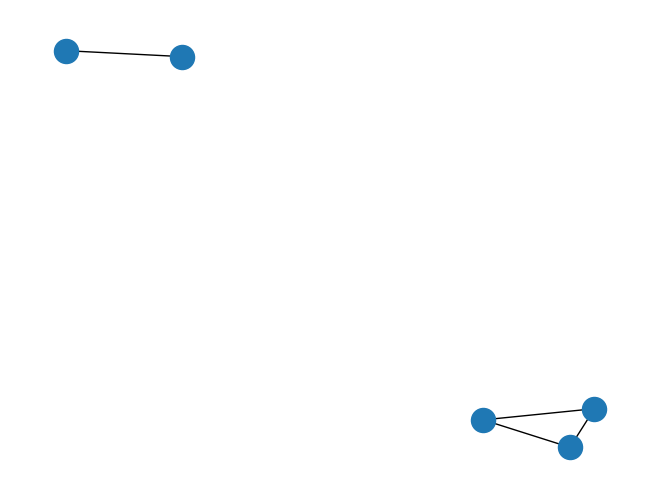

In [59]:
nx.draw(test_G)

In [60]:
l_S = [test_G.subgraph(c).copy() for c in nx.connected_components(test_G)]
len(l_S)

2

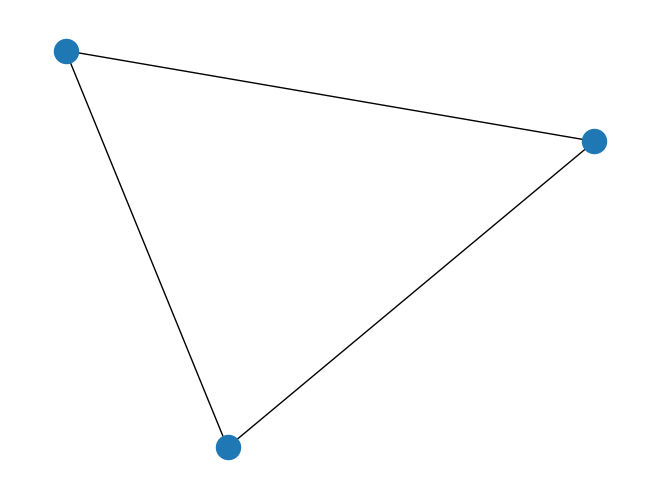

In [61]:
nx.draw(l_S[0]) # componente principal

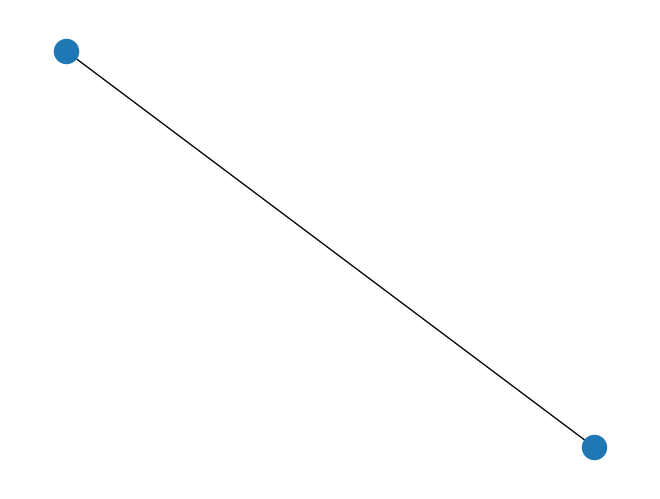

In [62]:
nx.draw(l_S[1])

#### 2.1.8. Coeficiente de clustering promedio $\langle C_i \rangle$

Probabilidad de vecinos comunes:

$\langle C_i \rangle = \frac{1}{N_i} \sum_n C^\prime_{n,i}$, donde $C^\prime_{n,i} = \frac{E^{(n)}}{k_n(k_n-1)}$

In [63]:
mean_clustering_coef = nx.average_clustering(G)
mean_clustering_coef

0.16

#### 2.1.9. Número de triángulos ($\#\Delta$)

Numero de triangulos que incluyen a un determinado nodo como uno de sus vertices.

In [64]:
nx.triangles(G)

{'Acciaiuoli': 0,
 'Medici': 1,
 'Castellani': 1,
 'Peruzzi': 2,
 'Strozzi': 2,
 'Barbadori': 0,
 'Ridolfi': 1,
 'Tornabuoni': 1,
 'Albizzi': 0,
 'Salviati': 0,
 'Pazzi': 0,
 'Bischeri': 1,
 'Guadagni': 0,
 'Ginori': 0,
 'Lamberteschi': 0}

#### 2.1.10. Longitud promedio del camino $\langle l \rangle$

Accesibilidad social entre no interactuantes:

$\langle l \rangle = \sum \sum l_{i,j}$

In [65]:
average_shortest_path_length = nx.average_shortest_path_length(G)
average_shortest_path_length

2.4857142857142858

## 2.2. Ejemplo: Comparativa de la topologia de dos redes

In [66]:
G1 = nx.florentine_families_graph()
G2 = nx.karate_club_graph()

Text(0.5, 1.0, '"Karate club"')

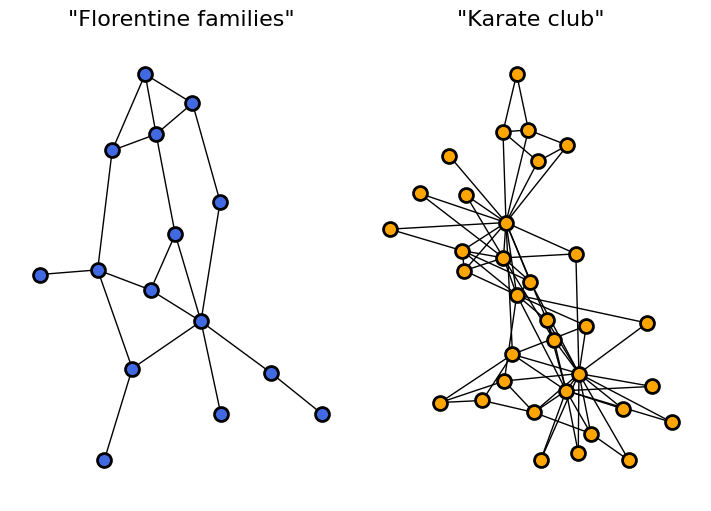

In [67]:
fig, axs = plt.subplots(figsize=(7,5), facecolor='w', nrows=1, ncols=2, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})

pos = nx.spring_layout(G1, iterations=100, seed=0)
sc = nx.draw_networkx_nodes(G1, pos, node_color='royalblue', linewidths=2, edgecolors='k', ax=axs[0], node_size=100)
nx.draw_networkx_edges(G1, pos, width=1, ax=axs[0])

pos = nx.spring_layout(G2, iterations=100, seed=0)
sc = nx.draw_networkx_nodes(G2, pos, node_color='orange', linewidths=2, edgecolors='k', ax=axs[1], node_size=100)
nx.draw_networkx_edges(G2, pos, width=1, ax=axs[1])
axs[0].axis('off'); axs[1].axis('off');
axs[0].set_title('"Florentine families"', fontsize=16)
axs[1].set_title('"Karate club"', fontsize=16)

Así, para ambos grafos, calcularemos las siguientes métricas:
+ Tamaño de la red ($N_i$)
+ Número de enlaces ($E_i$)
+ Grado medio de los nodos ($\langle K_{i} \rangle$)
+ Densidad ($d_i$)
+ Grado acumulado ($K_i$)
+ Coeficiente medio de agrupación ($\langle C_i \rangle$)
+ Número medio de triángulos ($\langle \# \Delta \rangle$)
+ Longitud media del camino ($\langle l \rangle$)

In [68]:
def get_topology_values(G):
  # input: `G` Networkx Graph
  # out: dict (key: metric name, value: metric value)
  d_topology_vals = {
      "network_size" : G.number_of_nodes(),
      "number_of_links" : G.number_of_edges(),
      "avg_degree" : np.mean(list(dict(G.degree()).values())),
      "density" : nx.density(G),
      "accumulated_degeree" : np.sum(list(dict(G.degree()).values())),
      "avg_clustering_coef" : nx.average_clustering(G),
      "avg_triangles" : np.mean(list(nx.triangles(G).values())),
      "avg_path_length" : nx.average_shortest_path_length(G),
  }

  return d_topology_vals

In [69]:
topology_G1 = get_topology_values(G1)
topology_G2 = get_topology_values(G2)

In [70]:
df = pd.DataFrame([topology_G1, topology_G2], index=["G_1", "G_2"])

In [71]:
df.T

,G_1,G_2
network_size,15.000000,34.000000
number_of_links,20.000000,78.000000
avg_degree,2.666667,4.588235
density,0.190476,0.139037
accumulated_degeree,40.000000,156.000000
avg_clustering_coef,0.160000,0.570638
avg_triangles,0.600000,3.970588
avg_path_length,2.485714,2.408200


---

# 3. Análisis de centralidad

## 3.1. Centralidad del grado (Degree centrality)

En networkx, podemos obtener la centralidad de grado utilizando el método `nx.degree_centrality(G)`, con `G` el Graph.

In [72]:
nx.degree_centrality(G)

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

In [73]:
degree_centrality = np.array(list(nx.degree_centrality(G).values()))
degree_centrality

array([0.07142857, 0.42857143, 0.21428571, 0.21428571, 0.28571429,
       0.14285714, 0.21428571, 0.21428571, 0.21428571, 0.14285714,
       0.07142857, 0.21428571, 0.28571429, 0.07142857, 0.07142857])

Podemos visualizar la centralidad de grado de cada nodo incluyendo estos valores como vector de entrada de `node_color` de la función `draw_networkx_nodes`.

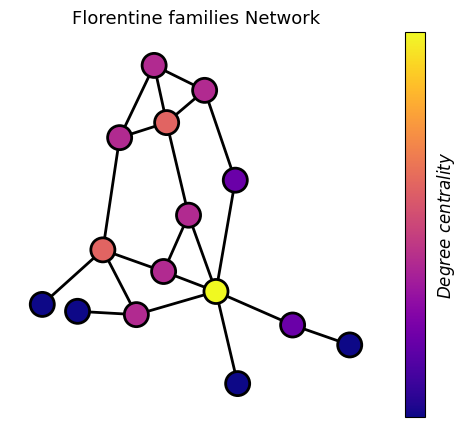

In [74]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1)
sc = nx.draw_networkx_nodes(
    G, pos, node_color=degree_centrality, 
    linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off'); axs.set_title("Florentine families Network", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Degree\ centrality$", fontsize=12)

## 3.2. Centralidad de cercanía (Closeness centrality)

In [75]:
closeness_centrality = np.array(list(nx.closeness_centrality(G).values()))
closeness_centrality

array([0.36842105, 0.56      , 0.38888889, 0.36842105, 0.4375    ,
       0.4375    , 0.5       , 0.48275862, 0.48275862, 0.38888889,
       0.28571429, 0.4       , 0.46666667, 0.33333333, 0.3255814 ])

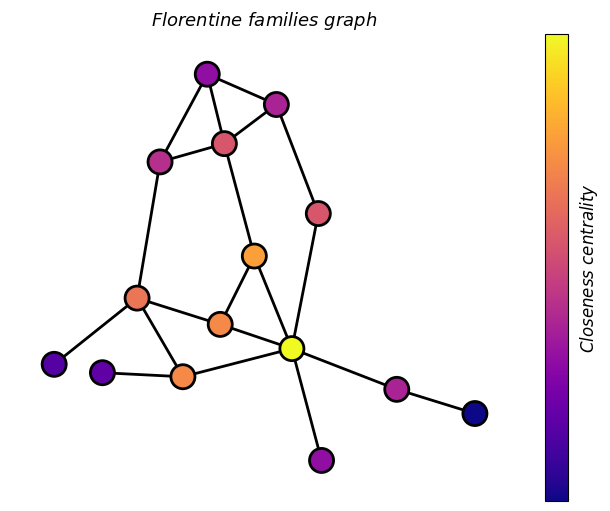

In [76]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=closeness_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Closeness\ centrality$", fontsize=12)

## 3.3. Centralidad de intermediación (Betweenness centrality)

In [77]:
betweenness_centrality = np.array(list(nx.betweenness_centrality(G).values()))
betweenness_centrality

array([0.        , 0.52197802, 0.05494505, 0.02197802, 0.1025641 ,
       0.09340659, 0.11355311, 0.09157509, 0.21245421, 0.14285714,
       0.        , 0.1043956 , 0.25457875, 0.        , 0.        ])

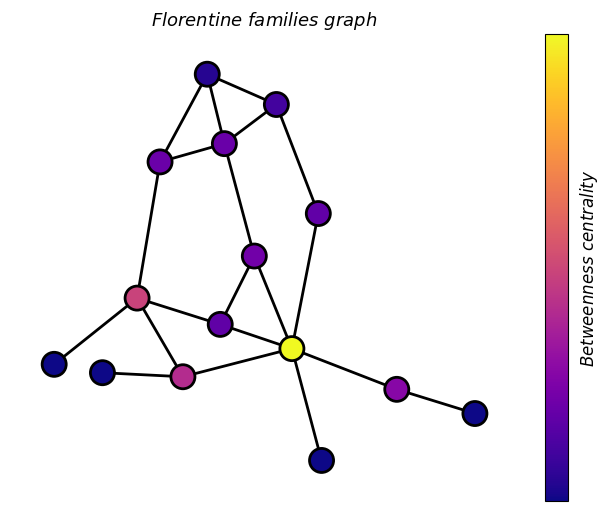

In [78]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=betweenness_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Betweenness\ centrality$", fontsize=12)

## 3.4. Eigenvector centrality

In [79]:
eigenvector_centrality = np.array(list(nx.eigenvector_centrality(G).values()))
eigenvector_centrality

array([0.13215732, 0.43031543, 0.25902004, 0.27572244, 0.35597303,
       0.21170575, 0.34155443, 0.3258467 , 0.24396053, 0.14592084,
       0.04481494, 0.2827944 , 0.28911716, 0.07492453, 0.08879253])

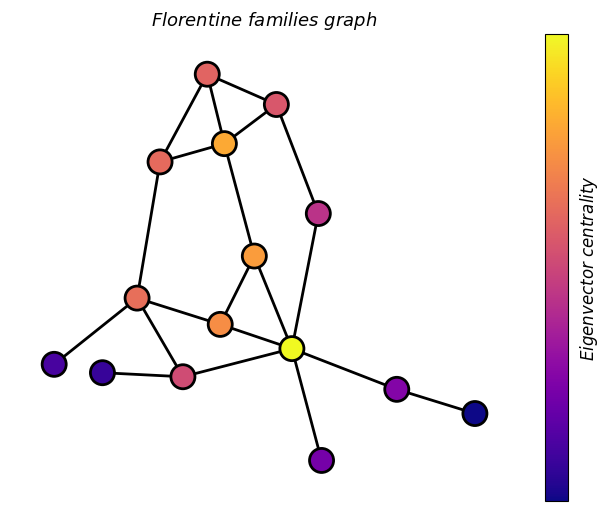

In [80]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=eigenvector_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Eigenvector\ centrality$", fontsize=12)

---

# 4. Análisis de redes a través del tiempo

In [81]:
def compute_features_from_graph(G):
  d_features = {
    'mean_degree' : np.mean(list(dict(G.degree()).values())),
    'density' : nx.density(G),
    'num_edges' : G.number_of_edges(),
    'num_connected_components' : nx.number_connected_components(G),
    'mean_clustering_coef' : nx.average_clustering(G),
    'num_triangles' : np.mean(list(dict(nx.triangles(G)).values()))
  }
  return d_features

In [82]:
def example_create_tensor():
  N = 10 # num nodos

  l_edges = list([
    [(0,1),(1,2),(0,2),(0,3),(2,3),(3,4),(5,6),(2,6),(6,9),(7,8),(7,9),(8,9)],
    [(0,1),(1,2),(0,2),(0,3),(2,3),(3,4),(5,6),(2,6),(6,9),(7,8),(7,9),(0,4)],
    [(0,1),(1,2),(0,2),(0,3),(2,3),(3,4),(5,6),(2,6),(6,9),(7,8),(1,9),(5,9)],
    [(0,1),(1,2),(0,2),(0,3),(3,4),(5,6),(2,6),(6,9),(7,8),(1,9),(5,9)],
    [(0,1),(1,2),(3,4),(5,6),(2,6),(6,9),(7,8),(1,9),(0,2)],
    [(0,1),(3,4),(3,6),(5,6),(2,6),(6,9),(7,8),(1,9),(0,2)],
    ])
  
  T = len(l_edges) # num steps

  A_T = np.zeros(shape=(T,N,N), dtype=np.int8)
  for i in range(len(l_edges)):
    for edge in l_edges[i]:
      A_T[i, edge[0], edge[1]] = 1;
      A_T[i, edge[1], edge[0]] = 1;

  return A_T

## 4.1. Creación de redes simples como grafos binarios en el tiempo

In [83]:
A_T = example_create_tensor()

In [84]:
T = A_T.shape[0]
N = A_T.shape[1]
print("# steps:", T)
print("# nodes:", N)

# steps: 6
# nodes: 10


Creación de una lista de grafos `l_G` a partir de matrices de adyacencia

In [85]:
l_G = [nx.Graph(A_T[i,:,:]) for i in range(T)]

Visualización de gráficos y matrices de disimilitud a lo largo del tiempo

In [86]:
pos = nx.spring_layout(l_G[0], iterations=100, seed=0)

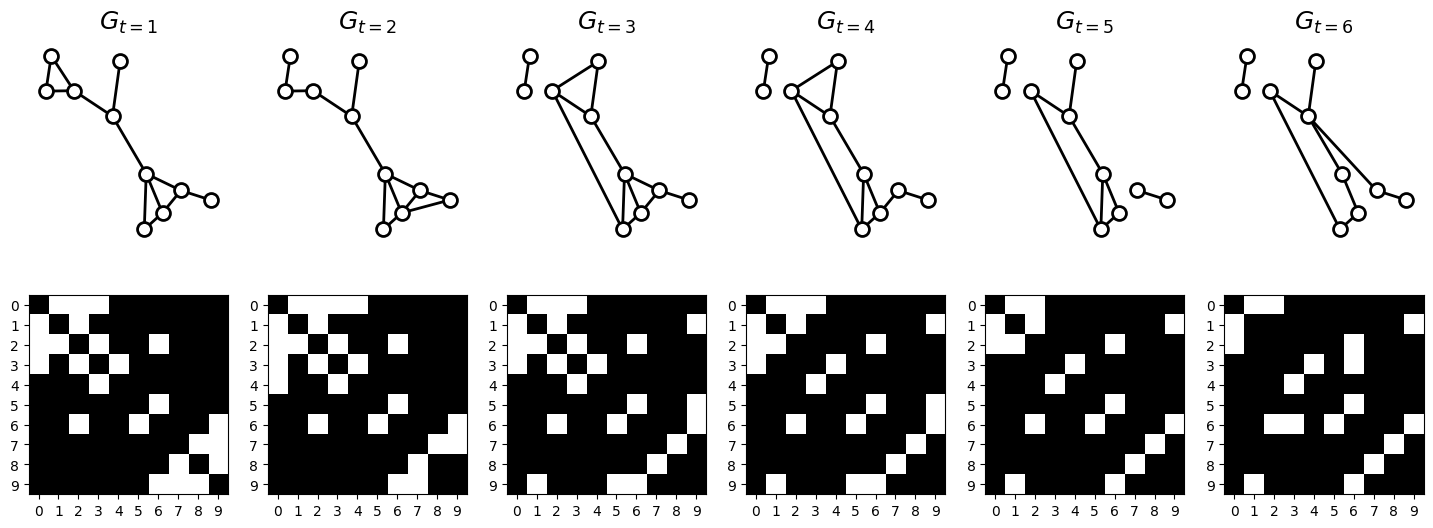

In [87]:
fig, axs = plt.subplots(figsize=(3*T,6), facecolor="w", nrows=2, ncols=T)
for i in range(T):
  # graph visualization
  nx.draw_networkx_nodes(
      l_G[i], pos, node_color='white', linewidths=2, 
      edgecolors='k', ax=axs[0][i], node_size=100)
  nx.draw_networkx_edges(l_G[i], pos, width=2, ax=axs[0][i])
  axs[0][i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
  axs[0][i].set_title("$G_{t=%i}$" % (i+1), fontsize=18)
  
  # adjacency matrix
  axs[1][i].imshow(A_T[i,:,:], cmap="Greys_r")
  axs[1][i].imshow(A_T[i,:,:], cmap="Greys_r")
  axs[1][i].set_xticks(range(N)); axs[1][i].set_yticks(range(N));

## 4.2. Análisis de las métricas topológicas en el tiempo

In [88]:
l_features = [compute_features_from_graph(l_G[i]) for i in range(T)]

In [89]:
df_features = pd.DataFrame(l_features)
df_features

,mean_degree,density,num_edges,num_connected_components,mean_clustering_coef,num_triangles
0,2.4,0.266667,12,1,0.466667,0.9
1,2.4,0.266667,12,1,0.350000,0.9
2,2.4,0.266667,12,2,0.333333,0.9
3,2.2,0.244444,11,2,0.266667,0.6
4,1.8,0.200000,9,3,0.166667,0.3
5,1.8,0.200000,9,2,0.000000,0.0


In [90]:
n_features = len(df_features.columns)

In [91]:
l_notation_metric = {
    'mean_degree' : r'$deg$',
    'density' : r'$d$',
    'num_edges' : r'$E$',
    'num_connected_components' : r'$c$',
    'mean_clustering_coef' : r'$\langle C \rangle$',
    'num_triangles' : r'$\# \Delta$'
}

## 4.3. Visualización de trazas

Text(0.5, 0, 'Step $i$')

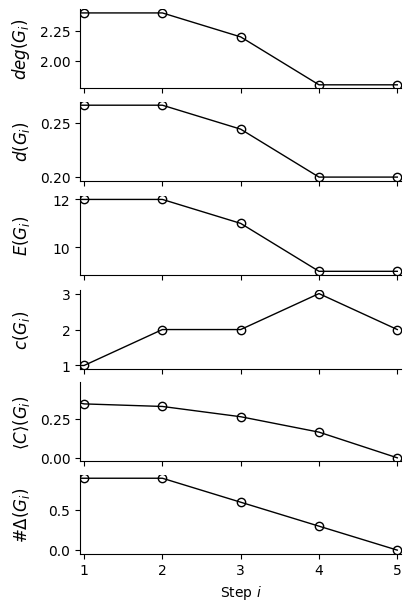

In [92]:
fig, axs = plt.subplots(
    facecolor="w", figsize=(4,n_features*1), 
    nrows=n_features, ncols=1, constrained_layout=True,
    sharex=True
    )
for i in range(n_features):
  axs[i].plot(
      df_features[df_features.columns.values[i]], 
      marker="o", color="k", fillstyle='none', lw=1)
  metric_name = df_features.columns.values[i]
  axs[i].set_ylabel("%s$(G_i)$" % l_notation_metric[metric_name], fontsize=12)
  axs[i].spines[['right', 'top']].set_visible(False)
  axs[i].set_xticks(range(1,n_features+1)); #axs[i].set_yticks([])
  axs[i].set_xlim([0.95, len(df_features.index)-0.95])
  axs[i].yaxis.set_label_coords(-0.15,0.5)

axs[-1].set_xlabel("Step $i$")

**Nota:** Para un $T$ creciente, podemos usar estas características para predecir estados futuros de la red! 

¿Tienes otras ideas sobre el uso de estas trazas?

----